Data Preprocessing

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn
pip install statsmodels

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 361.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/108.5 kB ? eta -:--:--
     ----------------------------------- -- 102.4/108.5 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 108.5/108.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 14.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.7/11.0 MB 15.0 MB/s eta 0:00:01
   -- ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset from CSV
data = pd.read_csv('sandwich.csv')

# Check structure and types
print(data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Confirm levels of categorical variables
print("\nBread types:")
print(data['bread'].value_counts())
print("\nToppings:")
print(data['topping'].value_counts())
print("\nButter presence:")
print(data['butter'].value_counts())

# Convert to categorical
data['bread'] = data['bread'].astype('category')
data['topping'] = data['topping'].astype('category')
data['butter'] = data['butter'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   antCount  48 non-null     int64 
 1   bread     48 non-null     object
 2   topping   48 non-null     object
 3   butter    48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB
None

Missing values in each column:
antCount    0
bread       0
topping     0
butter      0
dtype: int64

Bread types:
bread
Rye            12
Multi Grain    12
White          12
Whole Grain    12
Name: count, dtype: int64

Toppings:
topping
Ham and gherkins    16
Peanut butter       16
Yeast spread        16
Name: count, dtype: int64

Butter presence:
butter
no     24
yes    24
Name: count, dtype: int64


In [8]:
# Summary statistics by bread
bread_summary = data.groupby('bread')['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print("By Bread Type:\n", bread_summary)

# Summary statistics by topping
topping_summary = data.groupby('topping')['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print("By Topping:\n", topping_summary)

# Summary statistics by butter
butter_summary = data.groupby('butter')['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print("By Butter:\n", butter_summary)

# Summary statistics by bread and topping
bread_topping_summary = data.groupby(['bread', 'topping'])['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print("By Bread and Topping:\n", bread_topping_summary)

By Bread Type:
               mean  median    std  min  max
bread                                      
Multi Grain  43.00    40.0  18.23   19   76
Rye          44.25    42.0  13.40   21   65
White        42.25    44.5  15.86   18   67
Whole Grain  44.50    48.0  14.61   21   66
By Topping:
                    mean  median    std  min  max
topping                                         
Ham and gherkins  55.50    58.5  12.06   34   76
Peanut butter     40.38    44.5  14.18   19   60
Yeast spread      34.62    34.5  11.16   18   57
By Butter:
          mean  median    std  min  max
butter                                
no      38.12    37.0  14.07   18   65
yes     48.88    49.0  14.51   22   76
By Bread and Topping:
                                mean  median    std  min  max
bread       topping                                         
Multi Grain Ham and gherkins  58.50    61.0  16.66   36   76
            Peanut butter     37.00    34.5  19.82   19   60
            Yeast spread   

C:\Users\User\AppData\Local\Temp\ipykernel_21140\3153926115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bread_summary = data.groupby('bread')['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_21140\3153926115.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topping_summary = data.groupby('topping')['antCount'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_21140\3153926115.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

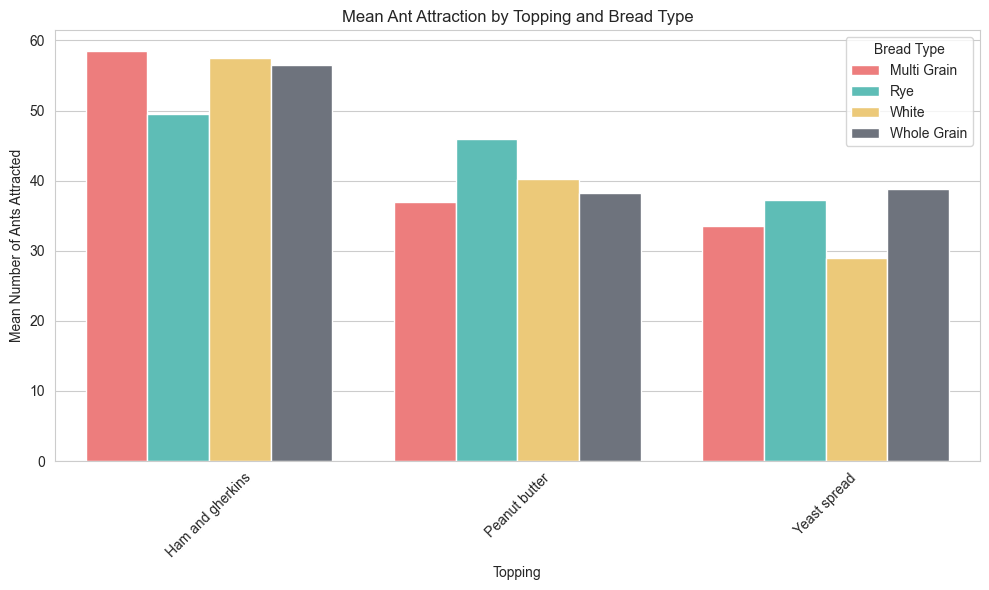

In [9]:
sns.set_style("whitegrid")

# Define colors for bread types
colors = ['#FF6B6B', '#4ECDC4', '#FFD166', '#6B7280']  # Coral, Teal, Mustard, Gray for 4 bread types

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='topping', y='antCount', hue='bread', data=data, palette=colors, errorbar=None)
plt.title('Mean Ant Attraction by Topping and Bread Type')
plt.xlabel('Topping')
plt.ylabel('Mean Number of Ants Attracted')
plt.legend(title='Bread Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('barplot_topping_bread.png', dpi=300, bbox_inches='tight')
plt.show()

Hypothesis testing

In [11]:
pip install pingouin

   ---------------------------------------- 0.0/204.4 kB ? eta -:--:--
   -------------------------------- ------- 163.8/204.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 204.4/204.4 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from scipy.stats import shapiro
import pingouin as pg
# Three-way ANOVA
model = ols('antCount ~ C(bread) * C(topping) * C(butter)', data=data).fit()
anova_table = anova_lm(model, typ=2)
print("ANOVA Table:\n", anova_table)

# Check assumptions
# Normality: Shapiro-Wilk test on residuals
residuals = model.resid
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test for Normality: W=%.3f, p=%.3f" % shapiro_test)

# Homogeneity: Levene's test (using the new 'group' column)
# Create a 'group' column combining all categorical factors
data['group'] = data['bread'].astype(str) + "_" + data['topping'].astype(str) + "_" + data['butter'].astype(str)

# Now run Levene's Test
levene_test = pg.homoscedasticity(data, dv='antCount', group='group')
print("Levene's Test for Homogeneity:\n", levene_test)

# Post-hoc tests for topping
tukey_topping = pairwise_tukeyhsd(endog=data['antCount'], groups=data['topping'], alpha=0.05)
print("Tukey HSD for Topping:\n", tukey_topping)

# Post-hoc for bread (optional)
tukey_bread = pairwise_tukeyhsd(endog=data['antCount'], groups=data['bread'], alpha=0.05)
print("Tukey HSD for Bread:\n", tukey_bread)

ANOVA Table:
                                 sum_sq    df          F    PR(>F)
C(bread)                         40.50   3.0   0.142043  0.933761
C(topping)                     3720.50   2.0  19.572994  0.000009
C(butter)                      1386.75   1.0  14.590969  0.000830
C(bread):C(topping)             577.00   6.0   1.011837  0.440987
C(bread):C(butter)              378.75   3.0   1.328365  0.288413
C(topping):C(butter)             56.00   2.0   0.294608  0.747479
C(bread):C(topping):C(butter)  2345.50   6.0   4.113108  0.005597
Residual                       2281.00  24.0        NaN       NaN
Shapiro-Wilk Test for Normality: W=0.990, p=0.943
Levene's Test for Homogeneity:
           W  pval  equal_var
levene  inf   0.0      False


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:3057: RuntimeWarning: divide by zero encountered in scalar divide
  W = numer / denom


Tukey HSD for Topping:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Ham and gherkins Peanut butter  -15.125 0.0038 -25.862  -4.388   True
Ham and gherkins  Yeast spread  -20.875 0.0001 -31.612 -10.138   True
   Peanut butter  Yeast spread    -5.75 0.4037 -16.487   4.987  False
---------------------------------------------------------------------
Tukey HSD for Bread:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Multi Grain         Rye     1.25 0.9973 -15.7843 18.2843  False
Multi Grain       White    -0.75 0.9994 -17.7843 16.2843  False
Multi Grain Whole Grain      1.5 0.9954 -15.5343 18.5343  False
        Rye       White     -2.0 0.9892 -19.0343 15.0343  False
        Rye Whol

C:\Users\User\AppData\Local\Temp\ipykernel_21140\1304273939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='topping', y='mean', data=ci_data, palette=['#FF6B6B', '#4ECDC4', '#FFD166'])


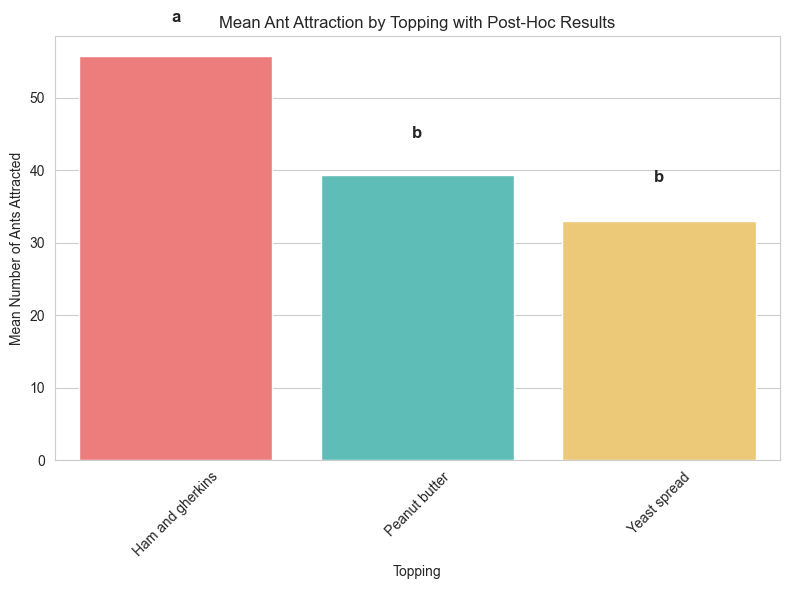

In [20]:

# Create bar plot with error bars and annotations
plt.figure(figsize=(8, 6))
sns.barplot(x='topping', y='mean', data=ci_data, palette=['#FF6B6B', '#4ECDC4', '#FFD166'])
plt.title('Mean Ant Attraction by Topping with Post-Hoc Results')
plt.xlabel('Topping')
plt.ylabel('Mean Number of Ants Attracted')
plt.xticks(rotation=45)

# Add significance annotations
plt.text(0, 60, 'a', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(1, 44, 'b', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(2, 38, 'b', ha='center', va='bottom', fontsize=12, fontweight='bold')
# plt.text(0.5, 65, '**', ha='center', va='bottom', fontsize=12)  # Ham vs. Peanut
# plt.text(1.5, 65, '***', ha='center', va='bottom', fontsize=12)  # Ham vs. Yeast

plt.tight_layout()
plt.savefig('posthoc_barplot.png', dpi=300, bbox_inches='tight')
plt.show()